In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler




In [7]:
# Dicionário de códigos para nomes das RGIs
codigos_regioes_imediatas = {
    290001: "Salvador (1)", 290002: "Alagoinhas (2)", 290003: "Santo Antônio de Jesus (3)",
    290004: "Cruz das Almas (4)", 290005: "Valença (5)", 290006: "Nazaré – Maragogipe (6)",
    290007: "Ilhéus – Itabuna (7)", 290008: "Teixeira de Freitas (8)",
    290009: "Eunápolis - Porto Seguro (9)", 290010: "Camacan (10)", 290011: "Vitória da Conquista (11)",
    290012: "Jequié (12)", 290013: "Brumado (13)", 290014: "Ipiaú (14)", 290015: "Itapetinga (15)",
    290016: "Guanambi (16)", 290017: "Bom Jesus da Lapa (17)", 290018: "Barreiras (18)",
    290019: "Santa Maria da Vitória (19)", 290020: "Irecê (20)", 290021: "Xique-Xique – Barra (21)",
    290022: "Juazeiro (22)", 290023: "Senhor do Bonfim (23)", 290024: "Paulo Afonso (24)",
    290025: "Ribeira do Pombal (25)", 290026: "Euclides da Cunha (26)", 290027: "Cícero Dantas (27)",
    290028: "Jeremoabo (28)", 290029: "Feira de Santana (29)", 290030: "Jacobina (30)",
    290031: "Itaberaba (31)", 290032: "Conceição do Coité (32)", 290033: "Serrinha (33)", 290034: "Seabra (34)"
}

codigos_abr = {
    290001: "01 Sa",
    290002: "02 Al",
    290003: "03 SJ ",
    290004: "04 CA",
    290005: "05 Vç",
    290006: "06 N-M",
    290007: "07 I-I",
    290008: "08 TF",
    290009: "09 E-P",
    290010: "10 Cn",
    290011: "11 VC",
    290012: "12 Jq",
    290013: "13 Bd",
    290014: "14 Ip",
    290015: "15 Ig",
    290016: "16 Gb",
    290017: "17 BJ",
    290018: "18 Br",
    290019: "19 SM",
    290020: "20 Ic",
    290021: "21 X-B",
    290022: "22 Jz",
    290023: "23 SB",
    290024: "24 PA",
    290025: "25 RP",
    290026: "26 EC",
    290027: "27 CD",
    290028: "28 Jm",
    290029: "29 FS",
    290030: "30 Jb",
    290031: "31 Ib",
    290032: "32 CC",
    290033: "33 Sr",
    290034: "34 Sb"
}

0.028030714459583456


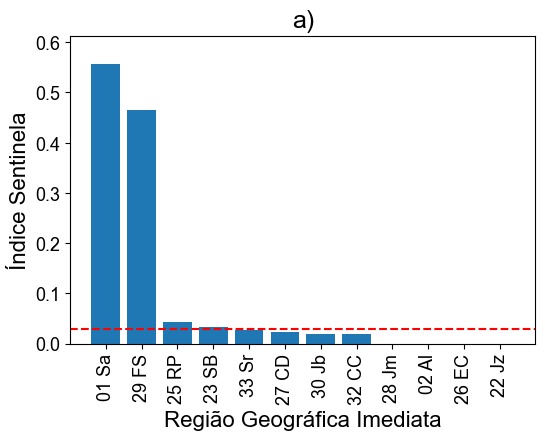

0.05158810446687028


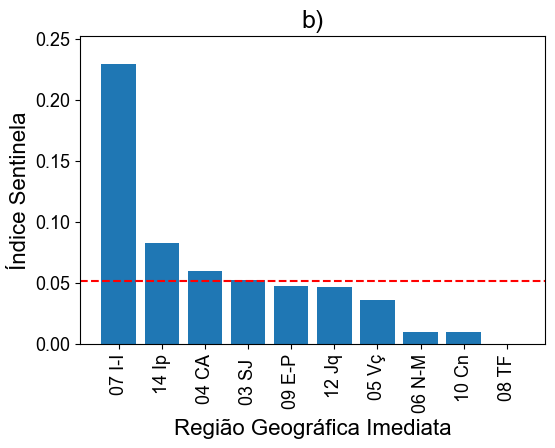

0.0339691225732575


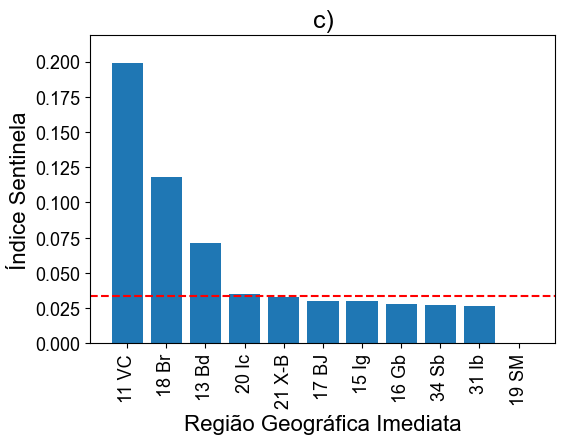

In [9]:

# Carregar os arquivos CSV
file_path_1 = "betweenns_pop_ba.csv"
file_path_2 = "dados_J.csv"

df_betweenns = pd.read_csv(file_path_1, sep=';')
df_grafico_barra = pd.read_csv(file_path_2, sep=';')

df_grafico_barra = df_grafico_barra.rename(columns={"codeRGI": "code_RGI"})

# Criar o escalador para normalização
scaler = MinMaxScaler()

# Normalizar a coluna "SIR"
df_grafico_barra["SIR_normalized"] = scaler.fit_transform(df_grafico_barra[["SIR"]])
df_betweenns ["pop_normalized"] = scaler.fit_transform(df_betweenns [["pop"]])

plt.rcParams['font.family'] = 'Arial'
# Unir os dois DataFrames com base na coluna "code_RGI"
df_merged = df_grafico_barra.merge(df_betweenns, on="code_RGI", how="inner")

# Criar a nova coluna multiplicando "SIR_normalized" pela "betweennes"
#df_merged["SIR_betweennes"] = np.sqrt(df_merged["SIR_normalized"] * df_merged["betweennes"])
#df_merged["SIR_betweennes"] = np.sqrt(df_merged["SIR"] * df_merged["betweennes"])
#df_merged["SIR_betweennes"] = np.sqrt(df_merged["SIR_normalized"] * df_merged["betweennes"]* df_merged["pop_normalized"])
df_merged["SIR_betweennes"] = np.cbrt(df_merged["SIR_normalized"] * df_merged["betweennes"] * df_merged["pop_normalized"])

# Substituir códigos pelos nomes
df_merged["RGI_nome"] = df_merged["code_RGI"].map(codigos_abr)

# Listas de categorias
list_c1_BA = sorted(["290001","290029","290033", "290025", "290027", "290002","290032", "290023", "290030", "290028", "290026", "290022"])
list_c2_BA = sorted(["290003", "290004", "290012", "290014", "290005", "290006","290007", "290008", "290009", "290010"])
list_c3_BA = sorted(["290011", "290013", "290016", "290017", "290018", "290034","290021", "290020", "290031", "290015", "290019"])

# Filtrar e plotar gráficos para cada lista
def plot_graph(filtered_list, title, percentile, filename):
    df_filtered = df_merged[df_merged["code_RGI"].astype(str).isin(filtered_list)]
    df_filtered = df_filtered.sort_values(by="SIR_betweennes", ascending=False)
    # Calcula o percentil
    percentile_value = np.percentile(df_filtered["SIR_betweennes"], percentile, method='linear')
    print(percentile_value)
    plt.figure(figsize=(6, 4))
    plt.bar(df_filtered["RGI_nome"], df_filtered["SIR_betweennes"])
    plt.xlabel("Região Geográfica Imediata", fontsize=16)
    plt.ylabel("Índice Sentinela", fontsize=16)
    plt.title(title, fontsize=18)
    plt.xticks(rotation=90, fontsize=13)
    plt.yticks(fontsize=13)

    #plt.yscale('log')
    plt.axhline(y=percentile_value, color='red', linestyle='--')

    plt.ylim(0, df_filtered["SIR_betweennes"].max() * 1.1)  # Define um limite ligeiramente maior que o máximo
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()

# Gerar gráficos
plot_graph(list_c1_BA, "a)", percentile=65, filename="fig_a.png")
plot_graph(list_c2_BA, "b)", percentile=65, filename="fig_b.png")
plot_graph(list_c3_BA, "c)", percentile=65, filename="fig_c.png")




